¡Hola,Ian!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola Ian, excelente trabajo! Tu código es correcto y ordenado. Resumes de muy buena forma los resultados y además tuviste decisiones muy acertadas durante el proyecto, como el filtrado de datos. Solo te dejé una recomendación que puedes aplicar en futuros proyectos, la cual es un uso más frecuente de visualizaciones para explicar tus resultados más importantes, aquellos que consideres que son de suma importancia mostrar a tus jefes o líderes de proyecto. Continúa esforzándote, saludos!
</div>

# Importar liberias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Importar Dataset

In [3]:
logs = pd.read_csv("/datasets/logs_exp_us.csv", sep="\t")

In [4]:
logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


# Modificación en columnas
    -cambio a minusculas
    -cambio de nombres

In [5]:
logs.columns = logs.columns.str.lower()
logs.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [6]:
logs = logs.rename(columns={"eventname":"event_name","deviceidhash":"devide_id_hash","eventtimestamp":"event_time_stamp","expid":"exp_id"})
logs.head()

,event_name,devide_id_hash,event_time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


# Modificación en datos
    -revisión de datos nulos
    -revisión de datos duplicados
    -cambio de tipos de datos
    -datos a minusculas
    -Eliminación de datos duplicados

In [7]:
logs.info()
print("-------------------------------------------------")
print(logs.isna().sum())
print("-------------------------------------------------")
duplicados_sesiones = logs.duplicated().sum()
print("Duplicados de la sesiones:",duplicados_sesiones)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   event_name        244126 non-null  object
 1   devide_id_hash    244126 non-null  int64 
 2   event_time_stamp  244126 non-null  int64 
 3   exp_id            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
-------------------------------------------------
event_name          0
devide_id_hash      0
event_time_stamp    0
exp_id              0
dtype: int64
-------------------------------------------------
Duplicados de la sesiones: 413


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo cargando tanto las librerías necesarias para el proyecto como el dataset con el separador adecuado. Además, la exploración inicial usando los métodos info()  siempre son muy útiles para detectar inconsistencias en las tablas como una gran cantidad de NA's o tipos de variable ineficientes.
</div>

In [8]:
logs["event_time_stamp"] = pd.to_datetime(logs["event_time_stamp"])
logs.head()

,event_name,devide_id_hash,event_time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,1970-01-01 00:00:01.564029816,246
1,MainScreenAppear,7416695313311560658,1970-01-01 00:00:01.564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1970-01-01 00:00:01.564054127,248
3,CartScreenAppear,3518123091307005509,1970-01-01 00:00:01.564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1970-01-01 00:00:01.564055322,248


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Transformaste el tipo de algunas variables a uno más adecuado para su manejo, específicamente las variables de fechas, las cuales con su tipo actual tienen mucho más métodos que facilitarán el desarrollo del proyecto. 
</div>

In [9]:
logs["event_name"] = logs["event_name"].str.lower()
logs.head()

,event_name,devide_id_hash,event_time_stamp,exp_id
0,mainscreenappear,4575588528974610257,1970-01-01 00:00:01.564029816,246
1,mainscreenappear,7416695313311560658,1970-01-01 00:00:01.564053102,246
2,paymentscreensuccessful,3518123091307005509,1970-01-01 00:00:01.564054127,248
3,cartscreenappear,3518123091307005509,1970-01-01 00:00:01.564054127,248
4,paymentscreensuccessful,6217807653094995999,1970-01-01 00:00:01.564055322,248


In [10]:
duplicados_sesiones = logs.duplicated().sum()
print("Duplicados de la sesiones:",duplicados_sesiones)

Duplicados de la sesiones: 413


In [11]:
logs = logs.drop_duplicates()
duplicados_sesiones = logs.duplicated().sum()
print("Duplicados de la sesiones:",duplicados_sesiones)

Duplicados de la sesiones: 0


In [12]:
logs["date"] = logs["event_time_stamp"].dt.date
print(logs)

                     event_name       devide_id_hash  \
0              mainscreenappear  4575588528974610257   
1              mainscreenappear  7416695313311560658   
2       paymentscreensuccessful  3518123091307005509   
3              cartscreenappear  3518123091307005509   
4       paymentscreensuccessful  6217807653094995999   
...                         ...                  ...   
244121         mainscreenappear  4599628364049201812   
244122         mainscreenappear  5849806612437486590   
244123         mainscreenappear  5746969938801999050   
244124         mainscreenappear  5746969938801999050   
244125       offersscreenappear  5746969938801999050   

                    event_time_stamp  exp_id        date  
0      1970-01-01 00:00:01.564029816     246  1970-01-01  
1      1970-01-01 00:00:01.564053102     246  1970-01-01  
2      1970-01-01 00:00:01.564054127     248  1970-01-01  
3      1970-01-01 00:00:01.564054127     248  1970-01-01  
4      1970-01-01 00:00:01.56405

## Estudiar y comprobar los datos
    -¿Cuántos eventos hay en los registros?
    -¿Cuántos usuarios hay en los registros?
    -¿Cuál es el promedio de eventos por usuario?
    -¿Qué periodo de tiempo cubren los datos?, ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? y ¿Qué periodo representan realmente los datos?
    -¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
    -Asegúrate de tener usuarios de los tres grupos experimentales.

In [13]:
num_eventos = logs.shape[0]
print("La cantidad de eventos en los registros es de:",num_eventos)
print("------------------------------------------------------")
print("\n")
num_usuarios = logs['devide_id_hash'].nunique()
print("La cantidad de usuarios en los registros es de",num_usuarios)
print("------------------------------------------------------")
print("\n")
promedio_eventos = num_eventos / num_usuarios
print(f"El promedio de eventos por usuario es: {promedio_eventos:.2f}")
print("------------------------------------------------------")

La cantidad de eventos en los registros es de: 243713
------------------------------------------------------


La cantidad de usuarios en los registros es de 7551
------------------------------------------------------


El promedio de eventos por usuario es: 32.28
------------------------------------------------------


La fecha y hora más antigua en los registros es: 1970-01-01 00:00:01.564029816
La fecha y hora más reciente en los registros es: 1970-01-01 00:00:01.565212517


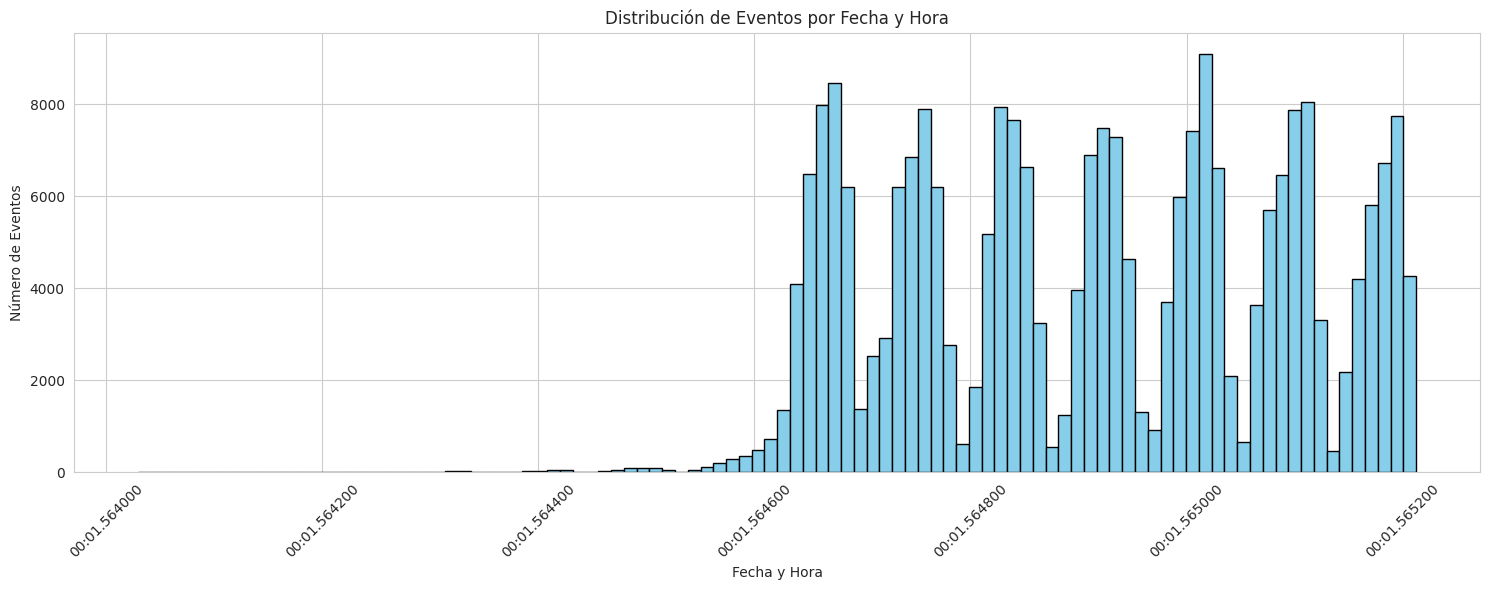

In [14]:
fecha_minima = logs['event_time_stamp'].min()
fecha_maxima = logs['event_time_stamp'].max()
print(f"La fecha y hora más antigua en los registros es: {fecha_minima}")
print(f"La fecha y hora más reciente en los registros es: {fecha_maxima}")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
logs['event_time_stamp'].hist(bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de Eventos por Fecha y Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo tanto graficando la distribución de los eventos como de tu decisión de hacer el filtrado de datos. Tal como dices, los datos antes del 1 de agosto del 2019 parecen estar incompletos, lo cual los hace muy poco útiles para el análisis de embudo e incluso podrían conducir a interpretaciones imprecisas.
</div>

### ¿Qué periodo de tiempo cubren los datos?, ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? y ¿Qué periodo representan realmente los datos?
    -Los datos cubren un periodo a primera vista desde mediados acercandose a los 00:01.564400.
    -No hay datos completos para todo el periodo.
    -Si tuvieramos que agarrar datos de forma continua e inicial, sería desde cuando empieza a ascender llegando al periodo de 00:01.564600; pero para datos más relevantes desde que el número de eventos llega aproximadamente a los 1500 o desde que llega a los 4000 aproximadamente en adelante.

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
    -No, si se calcularan los datos excluidos habrian un aproximado de 2500-2700, pero son datos que no son tan relevantes como los más actuales en donde llegan a superar hasta más de los 8000 y llega a descender aproximadamente a los 1700, 600, etc; pero los descensos actuales si nos sirven ya que nos pueden llegar a decir algo de lo que pasa.

In [15]:
usuarios_por_grupo = logs.groupby('exp_id')['event_time_stamp'].nunique()
print("Número de usuarios únicos en cada grupo experimental:")
print(usuarios_por_grupo)

Número de usuarios únicos en cada grupo experimental:
exp_id
246    66582
247    65712
248    71929
Name: event_time_stamp, dtype: int64


## Estudiar el embudo de eventos
    -¿Cuántos usuarios hay en cada grupo?
    -Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
    -Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
    -Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
    -¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [16]:
frecuencia_eventos = logs['event_name'].value_counts()
print("Frecuencia de cada evento:\n")
print(frecuencia_eventos)

Frecuencia de cada evento:

mainscreenappear           119101
offersscreenappear          46808
cartscreenappear            42668
paymentscreensuccessful     34118
tutorial                     1018
Name: event_name, dtype: int64


In [17]:
usuarios_por_evento = logs.groupby('event_name')['devide_id_hash'].nunique().sort_values(ascending=False)
total_usuarios = logs['devide_id_hash'].nunique()
proporcion_usuarios = (usuarios_por_evento / total_usuarios) * 100
print("\nNúmero de usuarios únicos por evento (ordenado por cantidad de usuarios):\n")
print(usuarios_por_evento)
print("\nProporción de usuarios que realizaron cada acción (respecto al total):\n")
print(proporcion_usuarios.round(2).astype(str) + '%')


Número de usuarios únicos por evento (ordenado por cantidad de usuarios):

event_name
mainscreenappear           7439
offersscreenappear         4613
cartscreenappear           3749
paymentscreensuccessful    3547
tutorial                    847
Name: devide_id_hash, dtype: int64

Proporción de usuarios que realizaron cada acción (respecto al total):

event_name
mainscreenappear           98.52%
offersscreenappear         61.09%
cartscreenappear           49.65%
paymentscreensuccessful    46.97%
tutorial                   11.22%
Name: devide_id_hash, dtype: object


In [18]:
orden_eventos = ['mainscreenappear', 'offersscreenappear', 'cartscreenappear', 'paymentscreensuccessful','tutorial']
embudo = logs.groupby('event_name')['devide_id_hash'].nunique().loc[orden_eventos]
embudo_pasos = embudo.to_frame(name='usuarios')
embudo_pasos['proporcion_siguiente'] = embudo_pasos['usuarios'] / embudo_pasos['usuarios'].shift(1)
embudo_pasos['proporcion_total'] = embudo_pasos['usuarios'] / embudo_pasos.loc['cartscreenappear', 'usuarios']
print("\nAnálisis del embudo de conversión:\n")
print(embudo_pasos.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x))


Análisis del embudo de conversión:

                        usuarios proporcion_siguiente proporcion_total
event_name                                                            
mainscreenappear         7439.00                  nan             1.98
offersscreenappear       4613.00                 0.62             1.23
cartscreenappear         3749.00                 0.81             1.00
paymentscreensuccessful  3547.00                 0.95             0.95
tutorial                  847.00                 0.24             0.23


In [19]:
nuevo_orden_eventos = ['mainscreenappear', 'cartscreenappear', 'paymentscreensuccessful']
nuevo_embudo = logs.groupby('event_name')['devide_id_hash'].nunique().loc[nuevo_orden_eventos]
nuevo_embudo_pasos = nuevo_embudo.to_frame(name='usuarios')
nuevo_embudo_pasos['proporcion_siguiente'] = nuevo_embudo_pasos['usuarios'] / nuevo_embudo_pasos['usuarios'].shift(1)
print("\nAnálisis del embudo de conversión (versión corregida):\n")
print(nuevo_embudo_pasos.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x))


Análisis del embudo de conversión (versión corregida):

                        usuarios proporcion_siguiente
event_name                                           
mainscreenappear         7439.00                  nan
cartscreenappear         3749.00                 0.50
paymentscreensuccessful  3547.00                 0.95


In [20]:
usuarios_primer_evento = nuevo_embudo.loc['mainscreenappear']
usuarios_ultimo_evento = nuevo_embudo.loc['paymentscreensuccessful']
porcentaje_completado = (usuarios_ultimo_evento / usuarios_primer_evento) * 100
print(f"\nPorcentaje de usuarios que completan todo el viaje (desde ver el producto hasta el éxito de la compra): {porcentaje_completado:.2f}%")


Porcentaje de usuarios que completan todo el viaje (desde ver el producto hasta el éxito de la compra): 47.68%


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buenos cálculos! Tu análisis sobre las etapas es correcto y las cifras y porcentajes que generas son muy buenas para dar a entender cuáles son las etapas donde más se pierden usuarios y aquellas en las que mayor retención hay. Además lo complementes con una visualización para mostrar tus resultados, sobre todo el porcentaje de usuarios que avanzan a la siguiente etapa. Como bien sabes, las gráficas siempre aportan mucho a una comprensión más rápida e intuitiva de los resultados.
</div>

## Estudiar los resultados del experimento
    -¿Cuántos usuarios hay en cada grupo?
    -Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
    -Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
    -Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
    -¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [21]:
usuarios_por_grupo = logs.groupby('exp_id')['devide_id_hash'].nunique()
print("Número de usuarios únicos por grupo experimental:")
print(usuarios_por_grupo)

Número de usuarios únicos por grupo experimental:
exp_id
246    2489
247    2520
248    2542
Name: devide_id_hash, dtype: int64


Dado que realizaremos múltiples pruebas, es prudente considerar un ajuste. Para este análisis, usaremos un 
alpha más conservador de 0.01 para reducir la probabilidad de falsos positivos.

In [22]:
logs['devide_id_hash'] = logs['devide_id_hash'].astype(str)
all_events = logs['event_name'].unique()
group_246 = logs[logs['exp_id'] == 246].copy()
group_247 = logs[logs['exp_id'] == 247].copy()
group_248 = logs[logs['exp_id'] == 248].copy()
group_control_combined = pd.concat([group_246, group_247])
event_counts = logs['event_name'].value_counts()
most_popular_event = event_counts.index[0]
print(f"--- El evento más popular es: '{most_popular_event}' ---")

--- El evento más popular es: 'mainscreenappear' ---


In [23]:
def check_proportions_difference(df1, df2, event_name, alpha):
    """
    Args:
        df1 (pd.DataFrame): DataFrame del primer grupo.
        df2 (pd.DataFrame): DataFrame del segundo grupo.
        event_name (str): Nombre del evento a analizar.
        alpha (float): Nivel de significancia.

    Returns:
        tuple: (p_value, is_significant)
    """
    n_users_1 = df1['devide_id_hash'].nunique()
    n_users_2 = df2['devide_id_hash'].nunique()
    event_users_1 = df1[df1['event_name'] == event_name]['devide_id_hash'].nunique()
    event_users_2 = df2[df2['event_name'] == event_name]['devide_id_hash'].nunique()
    stat, p_value = proportions_ztest(
        count=[event_users_1, event_users_2],
        nobs=[n_users_1, n_users_2],
        alternative='two-sided'
    )

    is_significant = p_value < alpha
    return p_value, is_significant

In [24]:
alpha_aa = 0.1
print(f"\n--- Test A/A: Grupos 246 vs 247 (alpha={alpha_aa}) ---")
print("Analizando las proporciones de usuarios para todos los eventos...")
aa_results = {}
for event in all_events:
    p_value, is_significant = check_proportions_difference(group_246, group_247, event, alpha_aa)
    aa_results[event] = {'p_value': p_value, 'significant': is_significant}
    print(f"Evento '{event}': p-value = {p_value:.4f}, ¿Significativo? {is_significant}")
significant_aa = [event for event, res in aa_results.items() if res['significant']]
print("\n--- Conclusión del Test A/A ---")
if len(significant_aa) == 0:
    print("No se encontraron diferencias estadísticamente significativas entre los grupos de control.")
    print("Esto confirma que los grupos se dividieron correctamente.")
else:
    print("Se encontraron diferencias estadísticamente significativas en los siguientes eventos:")
    for event in significant_aa:
        print(f"- {event}")
    print("\nEsto podría indicar un problema en la división de los grupos o en la aleatorización.")


--- Test A/A: Grupos 246 vs 247 (alpha=0.1) ---
Analizando las proporciones de usuarios para todos los eventos...
Evento 'mainscreenappear': p-value = 0.5857, ¿Significativo? False
Evento 'paymentscreensuccessful': p-value = 0.1090, ¿Significativo? False
Evento 'cartscreenappear': p-value = 0.1982, ¿Significativo? False
Evento 'offersscreenappear': p-value = 0.3233, ¿Significativo? False
Evento 'tutorial': p-value = 0.8757, ¿Significativo? False

--- Conclusión del Test A/A ---
No se encontraron diferencias estadísticamente significativas entre los grupos de control.
Esto confirma que los grupos se dividieron correctamente.


In [25]:
alpha_ab = 0.1
print(f"\n--- Test A/B: Grupo 248 vs. Grupos de Control (alpha={alpha_ab}) ---")
ab_results = {}
for event in all_events:
    ab_results[event] = {}
    p_248_vs_246, sig_248_vs_246 = check_proportions_difference(group_248, group_246, event, alpha_ab)
    ab_results[event]['248_vs_246'] = {'p_value': p_248_vs_246, 'significant': sig_248_vs_246}
    p_248_vs_247, sig_248_vs_247 = check_proportions_difference(group_248, group_247, event, alpha_ab)
    ab_results[event]['248_vs_247'] = {'p_value': p_248_vs_247, 'significant': sig_248_vs_247}
    p_248_vs_combined, sig_248_vs_combined = check_proportions_difference(group_248, group_control_combined, event, alpha_ab)
    ab_results[event]['248_vs_combined'] = {'p_value': p_248_vs_combined, 'significant': sig_248_vs_combined}
    print(f"\nEvento: '{event}'")
    print(f"  - 248 vs 246: p-value = {p_248_vs_246:.4f}, ¿Sig.? {sig_248_vs_246}")
    print(f"  - 248 vs 247: p-value = {p_248_vs_247:.4f}, ¿Sig.? {sig_248_vs_247}")
    print(f"  - 248 vs Combinado: p-value = {p_248_vs_combined:.4f}, ¿Sig.? {sig_248_vs_combined}")


--- Test A/B: Grupo 248 vs. Grupos de Control (alpha=0.1) ---

Evento: 'mainscreenappear'
  - 248 vs 246: p-value = 0.3977, ¿Sig.? False
  - 248 vs 247: p-value = 0.7632, ¿Sig.? False
  - 248 vs Combinado: p-value = 0.5067, ¿Sig.? False

Evento: 'paymentscreensuccessful'
  - 248 vs 246: p-value = 0.2340, ¿Sig.? False
  - 248 vs 247: p-value = 0.6764, ¿Sig.? False
  - 248 vs Combinado: p-value = 0.6578, ¿Sig.? False

Evento: 'cartscreenappear'
  - 248 vs 246: p-value = 0.1053, ¿Sig.? False
  - 248 vs 247: p-value = 0.7406, ¿Sig.? False
  - 248 vs Combinado: p-value = 0.2610, ¿Sig.? False

Evento: 'offersscreenappear'
  - 248 vs 246: p-value = 0.2532, ¿Sig.? False
  - 248 vs 247: p-value = 0.8781, ¿Sig.? False
  - 248 vs Combinado: p-value = 0.4555, ¿Sig.? False

Evento: 'tutorial'
  - 248 vs 246: p-value = 0.8963, ¿Sig.? False
  - 248 vs 247: p-value = 0.7733, ¿Sig.? False
  - 248 vs Combinado: p-value = 0.8087, ¿Sig.? False


In [27]:
print("\n--- Discusión del Nivel de Significancia ---")
total_events = len(all_events)
num_aa_tests = total_events
num_ab_tests = total_events * 3
total_tests = num_aa_tests + num_ab_tests
print(f"Total de pruebas de hipótesis realizadas: {total_tests}")
print("\nCon un nivel de significancia de 0.1, el 10% de los resultados significativos podrían ser falsos positivos (error de Tipo I).")
print(f"Para un total de {total_tests} pruebas, podríamos esperar {total_tests * 0.1:.2f} falsos positivos.")
print("Para mitigar esto, podemos ajustar el nivel de significancia usando la corrección de Bonferroni.")
alpha_bonferroni = 0.1 / total_tests
print(f"Nivel de significancia ajustado (Bonferroni): {alpha_bonferroni:.4f}")
print("\n--- Re-evaluación con el nivel de significancia ajustado ---")
re_eval_results_ab = {}
for event in all_events:
    re_eval_results_ab[event] = {}
    p_value, is_significant = check_proportions_difference(group_248, group_control_combined, event, alpha_bonferroni)
    re_eval_results_ab[event]['significant'] = is_significant
    print(f"Evento: '{event}', p-value = {p_value:.4f}, ¿Significativo con Bonferroni? {is_significant}")
print("\n--- Conclusiones Finales del Experimento ---")
significant_events_ab = [event for event, res in re_eval_results_ab.items() if res['significant']]
if len(significant_events_ab) == 0:
    print("Después de ajustar el nivel de significancia, no se encontraron diferencias significativas entre el grupo experimental y los grupos de control.")
    print("Conclusión: Las fuentes alteradas no tuvieron un impacto estadísticamente significativo en el comportamiento del usuario.")
else:
    print("Después de ajustar el nivel de significancia, se encontraron diferencias significativas en los siguientes eventos:")
    for event in significant_events_ab:
        print(f"- {event}")
    print("\nConclusión: La alteración de las fuentes parece haber tenido un impacto significativo en la proporción de usuarios que realizaron estos eventos.")


--- Discusión del Nivel de Significancia ---
Total de pruebas de hipótesis realizadas: 20

Con un nivel de significancia de 0.1, el 10% de los resultados significativos podrían ser falsos positivos (error de Tipo I).
Para un total de 20 pruebas, podríamos esperar 2.00 falsos positivos.
Para mitigar esto, podemos ajustar el nivel de significancia usando la corrección de Bonferroni.
Nivel de significancia ajustado (Bonferroni): 0.0050

--- Re-evaluación con el nivel de significancia ajustado ---
Evento: 'mainscreenappear', p-value = 0.5067, ¿Significativo con Bonferroni? False
Evento: 'paymentscreensuccessful', p-value = 0.6578, ¿Significativo con Bonferroni? False
Evento: 'cartscreenappear', p-value = 0.2610, ¿Significativo con Bonferroni? False
Evento: 'offersscreenappear', p-value = 0.4555, ¿Significativo con Bonferroni? False
Evento: 'tutorial', p-value = 0.8087, ¿Significativo con Bonferroni? False

--- Conclusiones Finales del Experimento ---
Después de ajustar el nivel de signifi

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Tu análisis es un excelente ejemplo de cómo validar la correcta implementación de un experimento mediante pruebas A/A. Tu comparación entre los grupos de control (246 y 247) utilizando la prueba chi-cuadrado para múltiples eventos del embudo de conversión demuestra tu enfoque muy bien organizado. Además, los resultados muestran que no hay diferencias estadísticamente significativas entre los grupos de control para ninguno de los eventos analizados, lo cual es muy importante para garantizar la validez del experimento.
</div>